# Import packages

In [1]:
# enables the %%R magic, not necessary if you've already done this
%load_ext rpy2.ipython

In [2]:
import pandas as pd
import numpy as np
#import TVGL as tvgl
from TVGL import TVGL

IndentationError: expected an indented block (TVGL.py, line 133)

## Import data through R

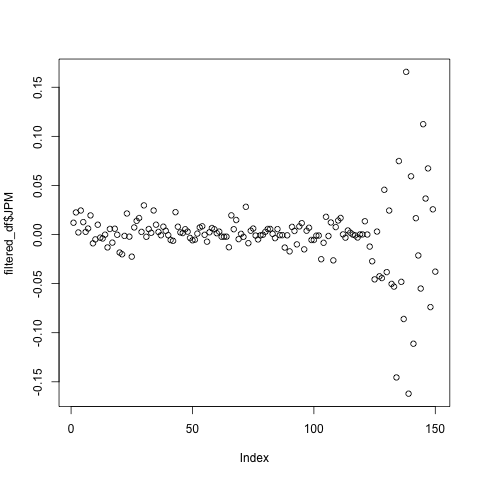

In [34]:
%%R

## Global parameters
window_length = 150
validation_window_length = 40
final_date = as.Date("2020-03-31")

###### Import data

# Returns
df <- read.table('./Data/Large_network/largenet_log_ret.csv',sep=",", header=TRUE)

# Format date column
df$Date <- as.Date(df$Date)

# Filter dataset based on the dates
filtered_df = subset(df, final_date >= as.Date(Date))
start_date = tail(filtered_df$Date,n=window_length)[1]
filtered_df = subset(filtered_df,as.Date(Date) >= start_date)
#print(filtered_df$Date)

# Get validation dataset
validation_df = subset(df,as.Date(Date) > final_date)
validation_final_date = head(validation_df$Date,n=validation_window_length)[validation_window_length]
validation_df = subset(validation_df,validation_final_date >= as.Date(Date))

# Inspect the results
plot(filtered_df$JPM)

# Get only the relevant columns
cols_to_drop = c('Date')
filtered_df = filtered_df[ , !(names(filtered_df) %in% cols_to_drop)]


validation_df = validation_df[ , !(names(validation_df) %in% cols_to_drop)]


# Standardize final dataset
filtered_df <- scale(filtered_df)
validation_df <- scale(validation_df)

In [35]:
%%R

filtered_mat = as.matrix(filtered_df)

In [36]:
# Push dataframe to Python environment
%R -o filtered_mat

In [37]:
type(filtered_mat)

rpy2.robjects.vectors.Matrix

In [38]:
# Check type of object
type(filtered_mat)

# Convert to numpy array
data = np.array(filtered_mat)

# Check shape
print(data.shape)

(150, 76)


# Time-varying Graphical Lasso

In [43]:
# Set parameters
lamb = 2.5
beta = 12
lengthOfSlice = 1

In [52]:
# Run the algorithm
#thetaSet = tvgl.TVGL(data, lengthOfSlice, lamb, beta, indexOfPenalty = 3, verbose=True)
#tvgl.inferGraphL1(data)
thetaSet = TVGL(data, lengthOfSlice, lamb, beta, indexOfPenalty = 3, verbose=True)



NameError: name 'TVGL' is not defined

In [46]:
dir(tvgl)

['__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

In [47]:
help(tvgl)

Help on package TVGL:

NAME
    TVGL

PACKAGE CONTENTS
    TVGL
    exampleTVGL
    inferGraphL1
    inferGraphL2
    inferGraphLaplacian
    inferGraphLinf
    inferGraphPN

FILE
    (built-in)




In [50]:
tvgl.package

AttributeError: module 'TVGL' has no attribute 'package'